## Loading The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

## Importing The Datasets

In [2]:
df_train = pd.read_csv("train.csv", low_memory = False)
df_test = pd.read_csv("test.csv", low_memory = False)
df_stores = pd.read_csv("stores.csv", low_memory = False)
df_features = pd.read_csv("features.csv", low_memory = False)
df_submission = pd.read_csv("sampleSubmission.csv", low_memory = False)

### Assessing the 'train.csv' dataset

In [3]:
df_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [4]:
df_train.shape

(421570, 5)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


There are 421570 rows with 5 features in the "train.csv" dataset.

- Store: the store number
- Dept: the department number
- Date: the week
- Weekly_Sales:  sales for the given department in the given store
- IsHoliday: whether the week is a special holiday week

### Checking for missing values

<AxesSubplot:>

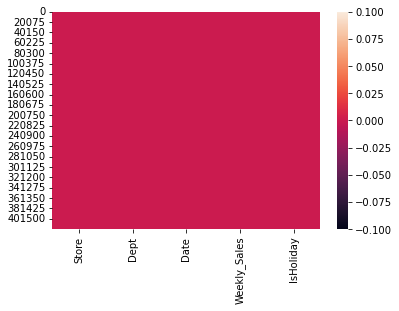

In [6]:
sns.heatmap(df_train.isnull())

In [7]:
df_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Looking at the count it is clear that there are no missing values

### Checking for duplicates

In [8]:
df_train.duplicated(subset=['Store', 'Dept', 'Date']).value_counts()

False    421570
dtype: int64

There are no duplicate values in the 'train.csv' dataset based on the columns 'Store', 'Dept', & 'Date'.

### Assessing the 'stores.csv' dataset

In [9]:
df_stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [10]:
df_stores.shape

(45, 3)

In [11]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


There are 45 rows with 3 features in the "stores.csv" dataset, where only 1 feature is categorical (Type) while the rest two features are numerical.

- Store: the store number
- Type: the store type A or B
- Size: the size of the store

### Checking for missing values

<AxesSubplot:>

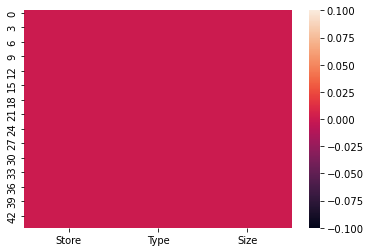

In [12]:
sns.heatmap(df_stores.isnull())

In [13]:
df_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

Looking at the count it is clear that there are no missing values

### Assessing the 'features.csv' dataset

In [14]:
df_features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [15]:
df_features.shape

(8190, 12)

In [16]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


There are 8190 rows with 12 features in the "features.csv" dataset.

- Store: the store number
- Date: the week
- Temperature: average temperature in the region
- Fuel_Price: cost of fuel in the region
- MarkDown 1-5: anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- CPI: the consumer price index
- Unemployment: the unemployment rate
- IsHoliday: whether the week is a special holiday week

### Checking for missing values

<AxesSubplot:>

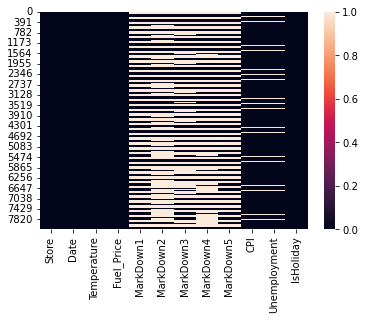

In [17]:
sns.heatmap(df_features.isnull())

In [18]:
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

The features MarkDown1, MarkDown2, MarkDown3, MarkDown4, & MarkDown5 have a lot a missing and even replacing the NaN values with either the mean or 0 could have an adverse effect on the accuracy and the efficiency of the model. So, the best way of dealing with such problem is to drop these features altogether to achieve a higher accuracy.

The features ‘CPI’ & ‘Unemployment’ have a very few numbers of missing values. Most of the values in these two features are very similar. Therefore, the mean of all the values can be taken to replace the NaN values in these features.

In [19]:
#Dropping the columns with many NaN values
df_features.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)

In [20]:
#Replacing the NaN values with mean
df_features['CPI'].fillna(value=df_features['CPI'].mean(), inplace=True)
df_features['Unemployment'].fillna(value=df_features['Unemployment'].mean(), inplace=True)

### Merging the datasets

In [21]:
df_merge = df_train.merge(df_stores, how='left').merge(df_features, how='left')

In [22]:
df_merge.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,211.380643,8.106
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,211.215635,8.106
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,211.018042,8.106
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,210.820450,7.808
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,210.622857,7.808


In [23]:
df_merge.shape

(421570, 11)

### Checking for missing values

<AxesSubplot:>

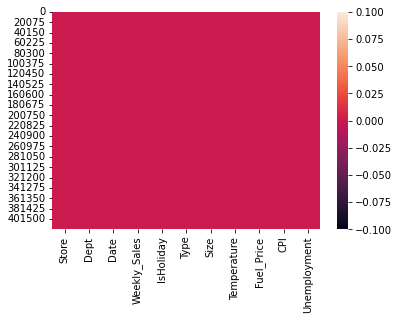

In [24]:
sns.heatmap(df_merge.isnull())

In [25]:
df_merge.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [26]:
#Checking for duplicates after merging
df_merge.duplicated(subset=['Store', 'Date', 'Dept']).value_counts()

False    421570
dtype: int64

### Splitting the 'Date' column into 'Year', 'Month' & 'Day'

In [27]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])
df_merge['Year'] = df_merge.Date.dt.year
df_merge['Month'] = df_merge.Date.dt.month
#df_merge['Month'] = df_merge['Month'].apply(lambda x: calendar.month_abbr[x])
df_merge['Day'] = df_merge.Date.dt.day
#df_merge['WeekOfYear'] = df_merge.Date.dt.isocalendar().week

In [28]:
df_merge.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2010,2,12
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,2010,3,5
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,211.380643,8.106,2010,3,12
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,211.215635,8.106,2010,3,19
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,211.018042,8.106,2010,3,26
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,210.820450,7.808,2010,4,2
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,210.622857,7.808,2010,4,9


In [29]:
df_merge['Month'] = df_merge['Month'].astype(str).str.zfill(2)
df_merge['Months'] = df_merge['Year'].astype(str) + " - " + df_merge['Month'].astype(str)
df_merge.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,02,5,2010 - 02
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2010,02,12,2010 - 02
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2010,02,19,2010 - 02
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2010,02,26,2010 - 02
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,2010,03,5,2010 - 03
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,211.380643,8.106,2010,03,12,2010 - 03
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,211.215635,8.106,2010,03,19,2010 - 03
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,211.018042,8.106,2010,03,26,2010 - 03
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,210.820450,7.808,2010,04,2,2010 - 04
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,210.622857,7.808,2010,04,9,2010 - 04


### Correlation Heatmap

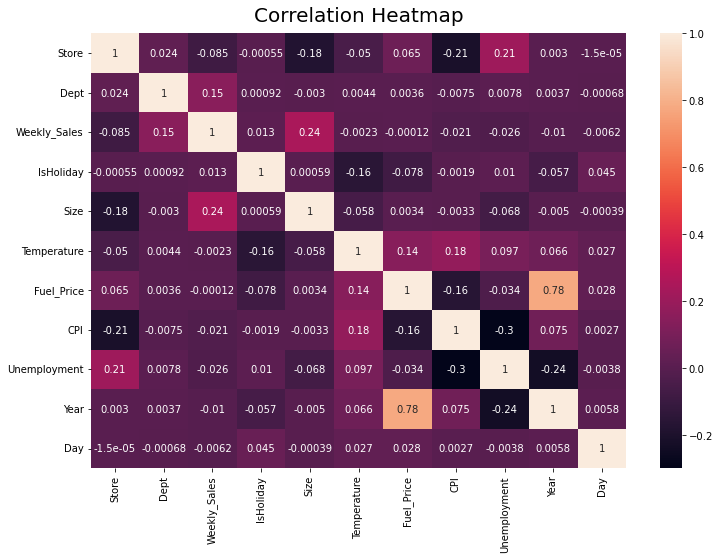

In [30]:
def heatmap_all(combined):
    plt.figure(figsize=(12, 8))
    heatmap = sns.heatmap(combined.corr(), annot=True)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
heatmap_all(df_merge)

### Data Visualization

In [31]:
#Year-Sales
Sales_Year = df_merge.groupby(['Year'])[['Weekly_Sales']].sum()
Sales_Year

,Weekly_Sales
Year,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


In [32]:
Sales_Year = Sales_Year.reset_index(level=0)

Text(0, 0.5, 'Number of Sales')

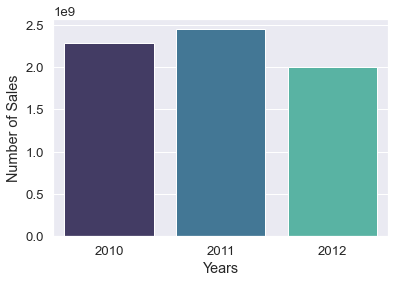

In [33]:
sns.set(rc = {'figure.figsize':(6,4)}, font_scale = 1.2)
sns.barplot(x='Year', y='Weekly_Sales', data=Sales_Year, palette="mako")
plt.xlabel("Years")
plt.ylabel("Number of Sales")

The year 2011 had the maximum number of sales, while 2012 had the minimum.

In [34]:
#Months-Sales
Sales_YearMonth = df_merge.groupby(['Months'])[['Weekly_Sales']].sum()
Sales_YearMonth.sort_values('Months')

,Weekly_Sales
Months,
2010 - 02,1.903330e+08
2010 - 03,1.819198e+08
2010 - 04,2.314124e+08
2010 - 05,1.867109e+08
2010 - 06,1.922462e+08
2010 - 07,2.325801e+08
2010 - 08,1.876401e+08
2010 - 09,1.772679e+08
2010 - 10,2.171618e+08


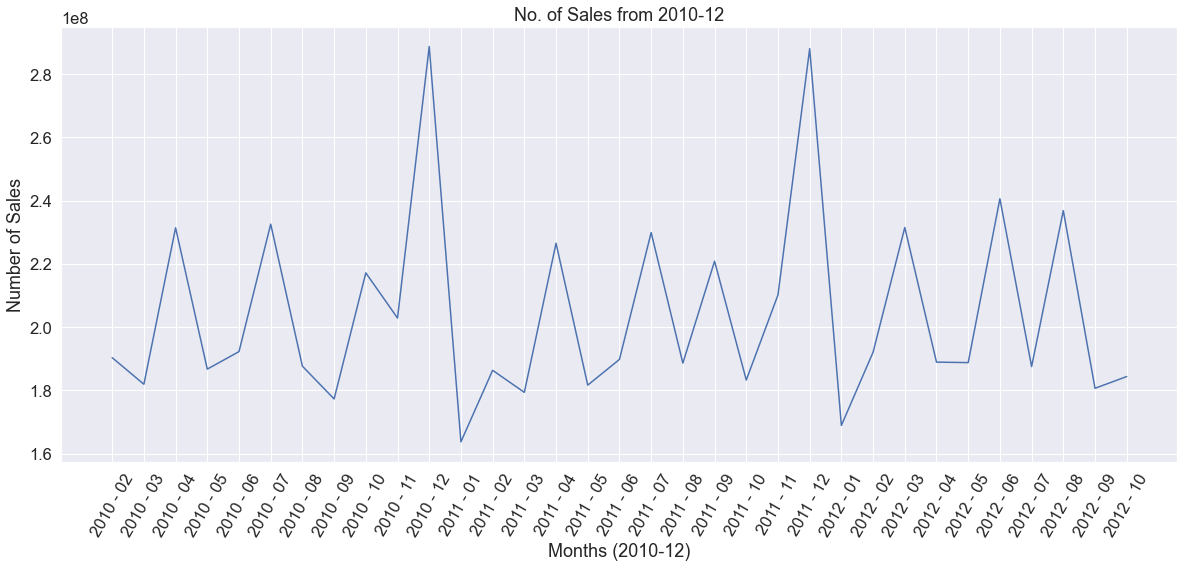

In [35]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=Sales_YearMonth, x="Months", y="Weekly_Sales").set(title="No. of Sales from 2010-12")
plt.xticks(rotation=60)
plt.xlabel("Months (2010-12)")
plt.ylabel("Number of Sales")
plt.show()

The graph depicts 3 phases. The 1st phase starts from Feb-2010 till Dec-2010 and shows some kind of linear trend and additive seasonality in the graph. But right after that 1st phase, from the start of the 2nd phase which is from Jan-2011 to Dec-2011, there is a sudden dip in the sales from Dec-2010 to Jan-2011.

The 2st phase starts from Jan-2011 to Dec-2011 and also shows some kind of linear trend and additive seasonality. The number of sales decreases from Dec-2011 to Jan-2012 right after the 2nd phase, which is quite similar what we see at the end of the 1st phase. The 3rd phase which starts from Jan-2012 and ends in Oct-2012 has no apparent trend but does show additive seasonality.

The graph shows a strong seasonality within each year and also shows some strong cyclic behavior with a period of about 10-11 months.

In [36]:
#Store_Types-Monthly_Sales
Type_YearMonth = df_merge.groupby(['Months', 'Type'])[['Weekly_Sales']].sum()
Type_YearMonth.sort_values('Months')

Weekly_Sales
Months    Type              
2010 - 02 A     1.221358e+08
          B     5.701083e+07
          C     1.118639e+07
2010 - 03 A     1.160196e+08
          B     5.484083e+07
...                      ...
2012 - 09 A     1.161865e+08
          C     1.164456e+07
2012 - 10 B     5.397152e+07
          A     1.186401e+08
          C     1.175008e+07

[99 rows x 1 columns]

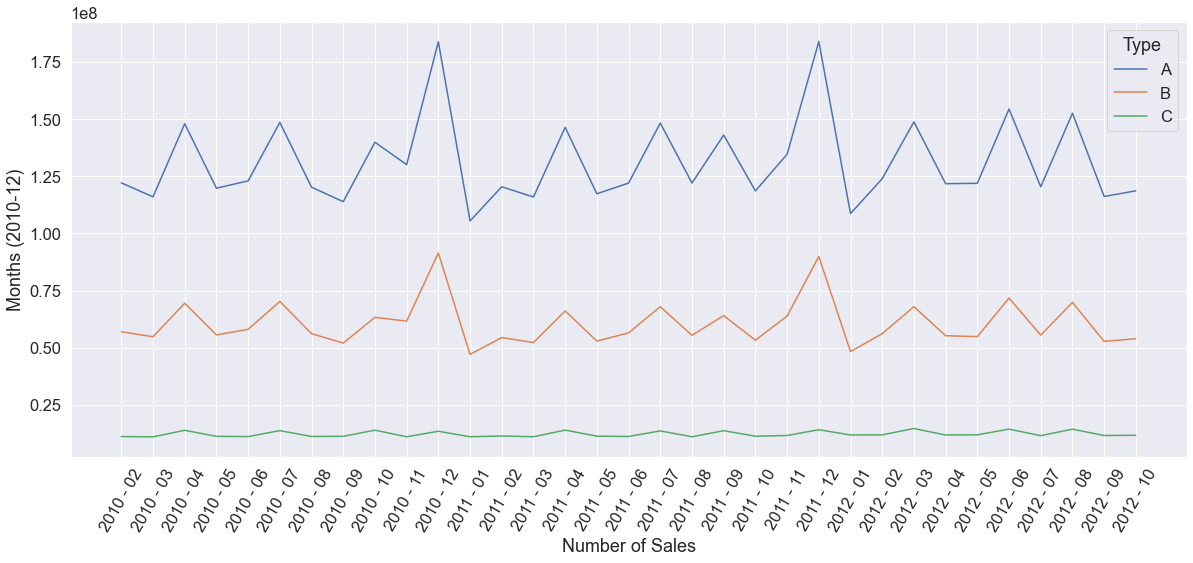

In [37]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=Type_YearMonth, x="Months", y="Weekly_Sales", hue="Type")
plt.xticks(rotation=60)
plt.xlabel("Number of Sales")
plt.ylabel("Months (2010-12)")
plt.show()

Store type ‘A’ had the maximum number of sales while store type ‘C’ had the minimum.

Text(0, 0.5, 'Store Count')

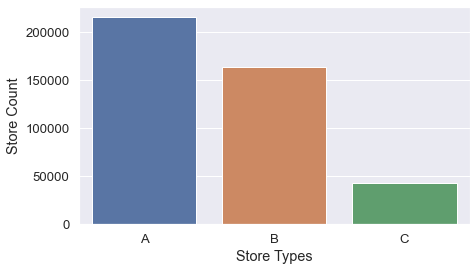

In [38]:
#Store_Type Count
sns.set(rc = {'figure.figsize':(7,4)}, font_scale = 1.2)
sns.countplot(x="Type", data=df_merge)
plt.xlabel("Store Types")
plt.ylabel("Store Count")

The number of stores for the type ‘A’ were a lot more as compared to the other two types.

Text(0, 0.5, 'Store Sizes')

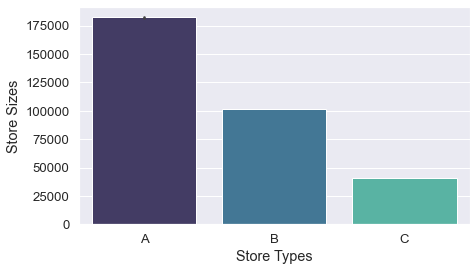

In [39]:
#Store_Type-Size
sns.set(rc = {'figure.figsize':(7,4)}, font_scale = 1.2)
sns.barplot(x='Type', y='Size', data=df_merge, palette="mako")
plt.xlabel("Store Types")
plt.ylabel("Store Sizes")

Compared to other two store types, the store sizes for the type ‘A’ were larger.

In [40]:
#Temperature-Months
Temp_YearMonth = df_merge.groupby(['Months'])[['Temperature']].mean()
Temp_YearMonth.sort_values('Months')

,Temperature
Months,
2010 - 02,35.578404
2010 - 03,46.700687
2010 - 04,56.396062
2010 - 05,64.884427
2010 - 06,74.591437
2010 - 07,78.920544
2010 - 08,78.450518
2010 - 09,72.300893
2010 - 10,61.645577


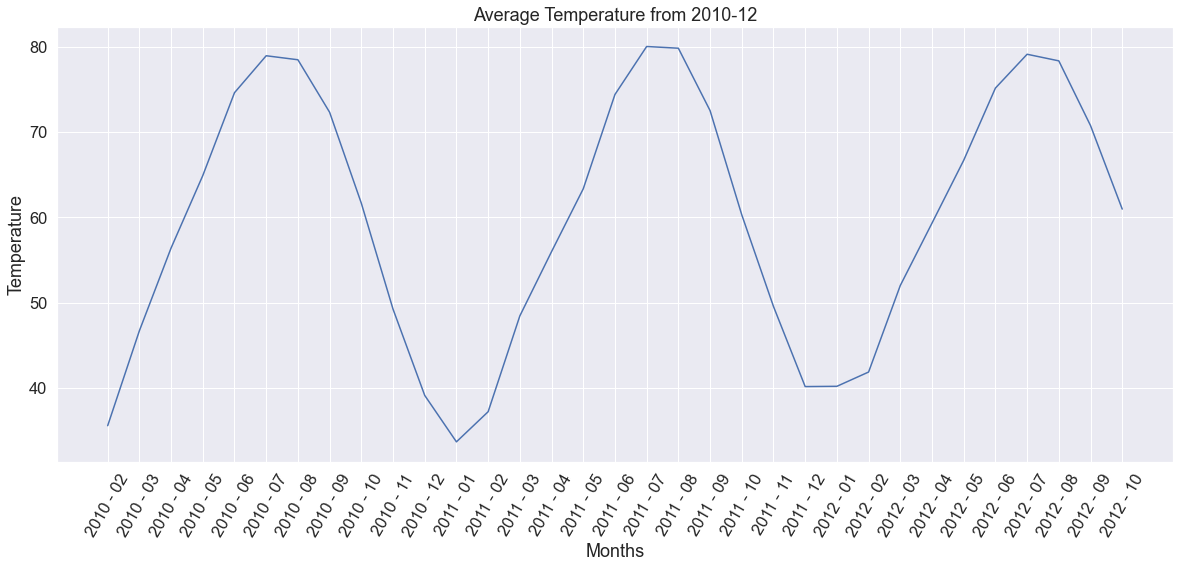

In [41]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=Temp_YearMonth, x="Months", y="Temperature").set(title="Average Temperature from 2010-12")
plt.xticks(rotation=60)
plt.show()

In [42]:
#Holiday-Sales
IsHol_YearMonth = df_merge.groupby(['Months', 'IsHoliday'])[['Weekly_Sales']].sum()
IsHol_YearMonth.sort_values('Months')

Weekly_Sales
Months    IsHoliday              
2010 - 02 False      1.419963e+08
          True       4.833668e+07
2010 - 03 False      1.819198e+08
2010 - 04 False      2.314124e+08
2010 - 05 False      1.867109e+08
2010 - 06 False      1.922462e+08
2010 - 07 False      2.325801e+08
2010 - 08 False      1.876401e+08
2010 - 09 False      1.316335e+08
          True       4.563440e+07
2010 - 10 False      2.171618e+08
2010 - 11 False      1.370324e+08
          True       6.582100e+07
2010 - 12 False      2.483280e+08
          True       4.043252e+07
2011 - 01 False      1.637040e+08
2011 - 02 False      1.389951e+08
          True       4.733619e+07
2011 - 03 False      1.793564e+08
2011 - 04 False      2.265265e+08
2011 - 05 False      1.816482e+08
2011 - 06 False      1.897734e+08
2011 - 07 False      2.299114e+08
2011 - 08 False      1.885993e+08
2011 - 09 False      1.740845e+08
          True       4.676323e+07
2011 - 10 False      1.832613e+08
2011 - 11 False      1.435687e+08
          True       6.659361e+07
2011 - 12 False      2.420356e+08
          True       4.604246e+07
2012 - 01 False      1.688945e+08
2012 - 02 True       5.000941e+07
          False      1.420542e+08
2012 - 03 False      2.315097e+08
2012 - 04 False      1.889209e+08
2012 - 05 False      1.887665e+08
2012 - 06 False      2.406103e+08
2012 - 07 False      1.875095e+08
2012 - 08 False      2.368508e+08
2012 - 09 False      1.323155e+08
          True       4.833006e+07
2012 - 10 False      1.843617e+08

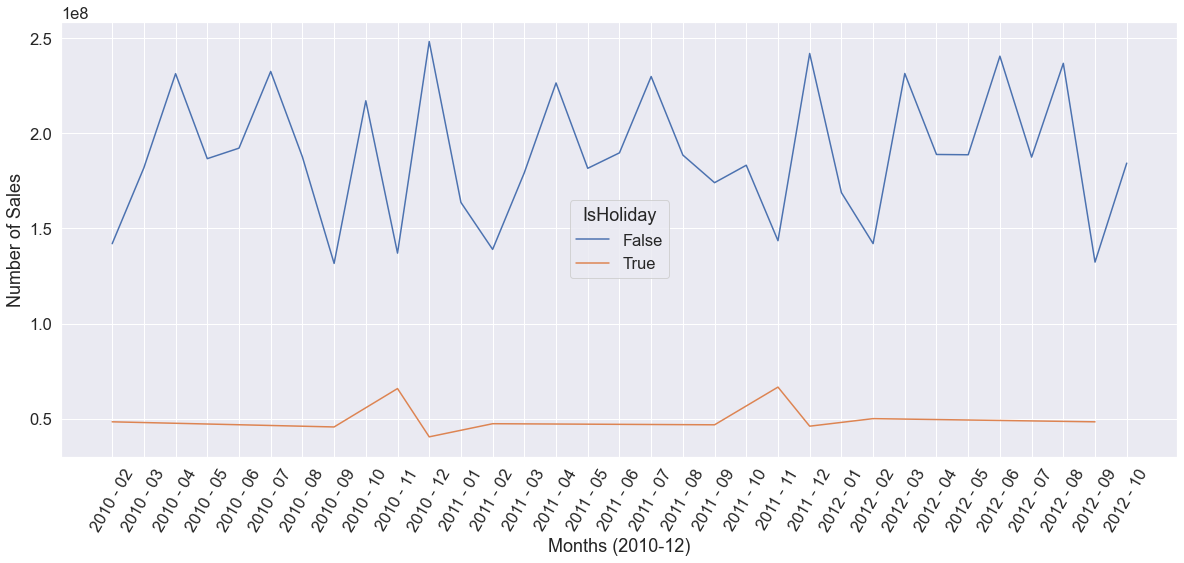

In [43]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=IsHol_YearMonth, x="Months", y="Weekly_Sales", hue="IsHoliday")
plt.xticks(rotation=60)
plt.xlabel("Months (2010-12)")
plt.ylabel("Number of Sales")
plt.show()

Even though the number of monthly sales were not zero but were quite low whenever there was a holiday, while the sales numbers were definitely high there weren’t any holidays.

Text(0, 0.5, 'Sales')

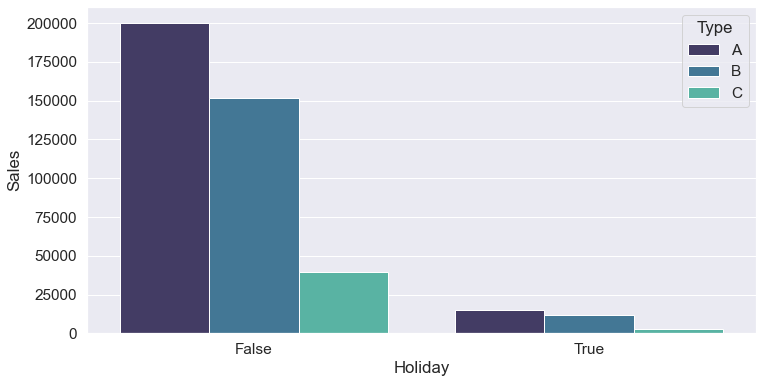

In [44]:
#StoreType-Holiday
sns.set(rc = {'figure.figsize':(12,6)}, font_scale = 1.4)
sns.countplot(x='IsHoliday',hue='Type', data=df_merge, palette="mako")
plt.xlabel("Holiday")
plt.ylabel("Sales")

The bar graph shows that sales for store type ‘A’ were higher as compared to the other two types no matter whether there was a holiday or not, while store type ‘C’ had the minimum number of sales and were close to zero for store type ‘C’ when there was a holiday.

In [45]:
#Unemployment_Rate-Months
U_YearMonth = df_merge.groupby(['Months'])[['Unemployment']].mean()
U_YearMonth.sort_values('Months')

,Unemployment
Months,
2010 - 02,8.570455
2010 - 03,8.575151
2010 - 04,8.446687
2010 - 05,8.450495
2010 - 06,8.452238
2010 - 07,8.381368
2010 - 08,8.385104
2010 - 09,8.382072
2010 - 10,8.429697


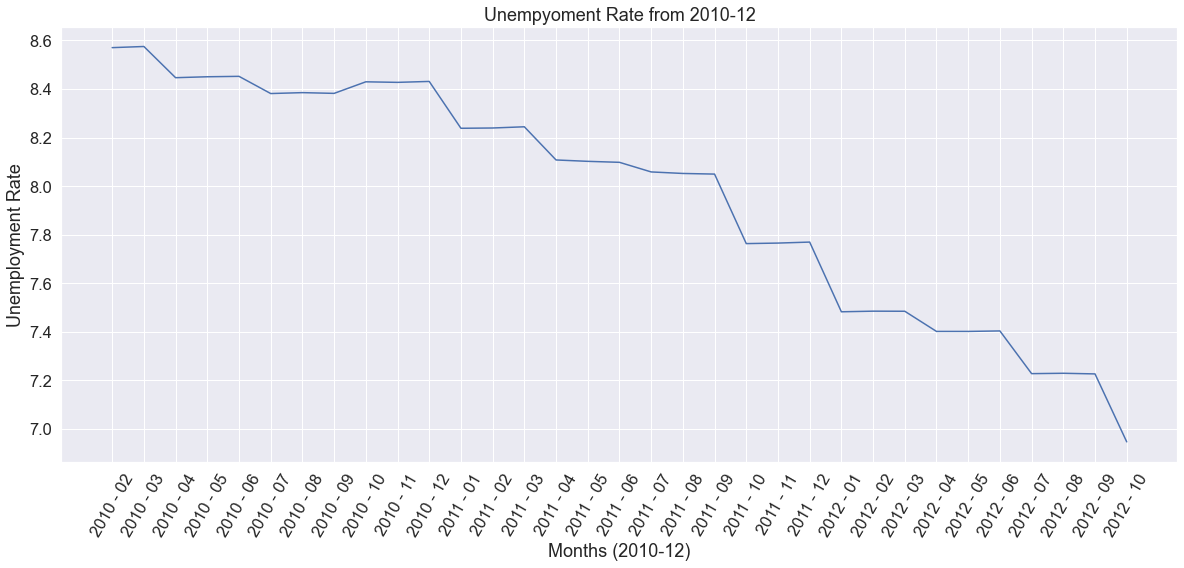

In [46]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=U_YearMonth, x="Months", y="Unemployment").set(title="Unempyoment Rate from 2010-12")
plt.xticks(rotation=60)
plt.xlabel("Months (2010-12)")
plt.ylabel("Unemployment Rate")
plt.show()

There appears to be a strong downward decreasing trend with strong seasonality in the unemployment rates during the three-year period from Feb-2010 to Oct-2012, but there is no presence of any kind of cyclic behavior.

In [47]:
#Fuel_Prices-Months
FP_YearMonth = df_merge.groupby(['Months'])[['Fuel_Price']].mean()
FP_YearMonth.sort_values('Months')

,Fuel_Price
Months,
2010 - 02,2.693286
2010 - 03,2.786482
2010 - 04,2.867585
2010 - 05,2.917168
2010 - 06,2.788118
2010 - 07,2.773271
2010 - 08,2.781510
2010 - 09,2.733279
2010 - 10,2.807065


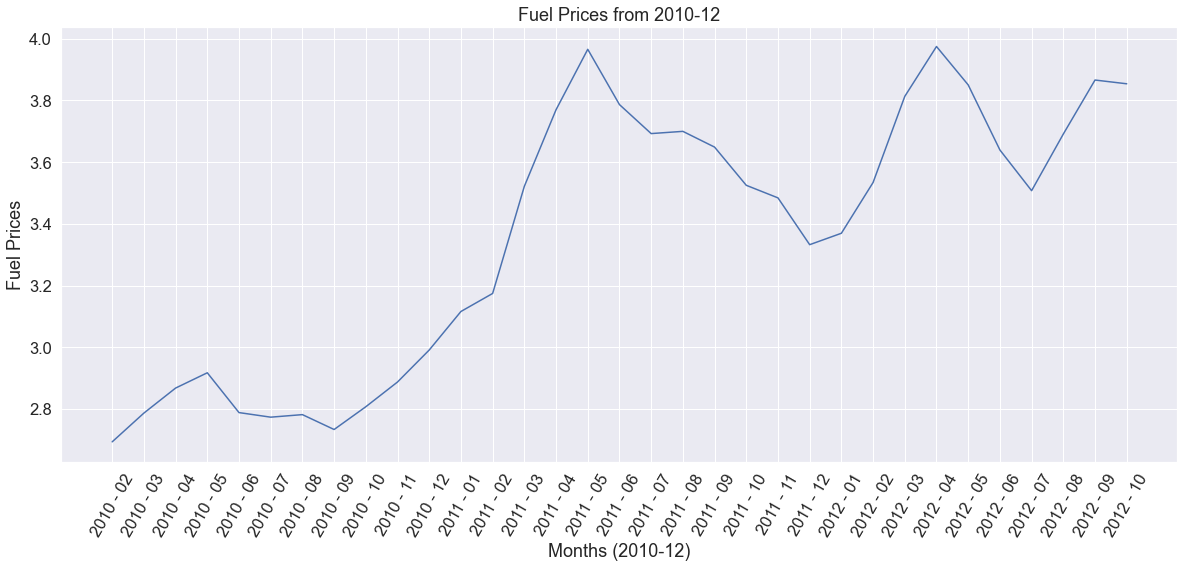

In [48]:
sns.lineplot(data=FP_YearMonth, x="Months", y="Fuel_Price").set(title="Fuel Prices from 2010-12")
plt.xticks(rotation=60)
plt.xlabel("Months (2010-12)")
plt.ylabel("Fuel Prices")
plt.show()

There was a sudden increase in the fuel prices from Sep-2010 where the prices were as low as 2.7 dollars to May-2011 where they reached the highest with prices reaching close to 4 dollars. The prices seem to decrease a bit for a period of 8-10 months but then again when back up to 4 dollars in Apr-2012.

### Encoding the Categorical Variables

In [49]:
#Creating a dummy dataset and dropping 'Date' column
df_model = df_merge.copy()
df_model.drop(['Date'], axis=1, inplace=True)

In [50]:
df_model.head(10)

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months
0,1,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,02,5,2010 - 02
1,1,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2010,02,12,2010 - 02
2,1,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2010,02,19,2010 - 02
3,1,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2010,02,26,2010 - 02
4,1,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,2010,03,5,2010 - 03
5,1,1,21043.39,False,A,151315,57.79,2.667,211.380643,8.106,2010,03,12,2010 - 03
6,1,1,22136.64,False,A,151315,54.58,2.720,211.215635,8.106,2010,03,19,2010 - 03
7,1,1,26229.21,False,A,151315,51.45,2.732,211.018042,8.106,2010,03,26,2010 - 03
8,1,1,57258.43,False,A,151315,62.27,2.719,210.820450,7.808,2010,04,2,2010 - 04
9,1,1,42960.91,False,A,151315,65.86,2.770,210.622857,7.808,2010,04,9,2010 - 04


### One-Hot Encoding

In [51]:
cat_cols = df_model[['IsHoliday', 'Type']] 

In [52]:
from sklearn.preprocessing import OneHotEncoder
#One-hot-encoding the categorical columns.
encoder = OneHotEncoder(handle_unknown='ignore')
#Converting it to dataframe
df_encoder = pd.DataFrame(encoder.fit_transform(cat_cols).toarray())
df_final = df_model.join(df_encoder)
df_final.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months,0,1,2,3,4
0,1,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,02,5,2010 - 02,1.0,0.0,1.0,0.0,0.0
1,1,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2010,02,12,2010 - 02,0.0,1.0,1.0,0.0,0.0
2,1,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2010,02,19,2010 - 02,1.0,0.0,1.0,0.0,0.0
3,1,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2010,02,26,2010 - 02,1.0,0.0,1.0,0.0,0.0
4,1,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,2010,03,5,2010 - 03,1.0,0.0,1.0,0.0,0.0


In [53]:
#Dropping the columns that have already been One-Hot-Encoded
df_final.drop(['IsHoliday', 'Type', 'Months'], axis=1, inplace=True)

In [54]:
col = df_final.pop('Weekly_Sales')
df_final.insert(0, 'Weekly_Sales', col)
df_final.head()

,Weekly_Sales,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,0,1,2,3,4
0,24924.50,1,1,151315,42.31,2.572,211.096358,8.106,2010,02,5,1.0,0.0,1.0,0.0,0.0
1,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,2010,02,12,0.0,1.0,1.0,0.0,0.0
2,41595.55,1,1,151315,39.93,2.514,211.289143,8.106,2010,02,19,1.0,0.0,1.0,0.0,0.0
3,19403.54,1,1,151315,46.63,2.561,211.319643,8.106,2010,02,26,1.0,0.0,1.0,0.0,0.0
4,21827.90,1,1,151315,46.50,2.625,211.350143,8.106,2010,03,5,1.0,0.0,1.0,0.0,0.0


In [55]:
X = df_final.iloc[:, 1:].values
y = df_final.iloc[:, 0].values

In [56]:
X

array([[1, 1, 151315, ..., 1.0, 0.0, 0.0],
       [1, 1, 151315, ..., 1.0, 0.0, 0.0],
       [1, 1, 151315, ..., 1.0, 0.0, 0.0],
       ...,
       [45, 98, 118221, ..., 0.0, 1.0, 0.0],
       [45, 98, 118221, ..., 0.0, 1.0, 0.0],
       [45, 98, 118221, ..., 0.0, 1.0, 0.0]], dtype=object)

In [57]:
y

array([24924.5 , 46039.49, 41595.55, ...,  1061.02,   760.01,  1076.8 ])

### Splitting the dataset

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [59]:
X_train

array([[39, 72, 184109, ..., 1.0, 0.0, 0.0],
       [17, 25, 93188, ..., 0.0, 1.0, 0.0],
       [4, 16, 205863, ..., 1.0, 0.0, 0.0],
       ...,
       [32, 82, 203007, ..., 1.0, 0.0, 0.0],
       [28, 3, 206302, ..., 1.0, 0.0, 0.0],
       [13, 99, 219622, ..., 1.0, 0.0, 0.0]], dtype=object)

In [60]:
X_test

array([[39, 59, 184109, ..., 1.0, 0.0, 0.0],
       [23, 71, 114533, ..., 0.0, 1.0, 0.0],
       [17, 40, 93188, ..., 0.0, 1.0, 0.0],
       ...,
       [33, 16, 39690, ..., 1.0, 0.0, 0.0],
       [31, 90, 203750, ..., 1.0, 0.0, 0.0],
       [11, 90, 207499, ..., 1.0, 0.0, 0.0]], dtype=object)

In [61]:
y_train

array([55278.88,  7229.18, 30849.37, ..., 14492.74,  7713.66,   600.  ])

In [62]:
y_test

array([  202.76, 16482.  , 48167.29, ...,   261.  , 91894.23, 48095.78])

### Random Forest Regression Model

In [63]:
#Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting the Test set results

In [64]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
pred = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
pred[:10, :]

array([[  321.09,   202.76],
       [13438.8 , 16482.  ],
       [47401.37, 48167.29],
       [27510.49, 21581.64],
       [ 1342.5 ,  1315.  ],
       [ 8317.96,  8683.26],
       [52244.08, 36639.21],
       [ 5632.51,  5631.81],
       [ 7716.44,  8159.89],
       [ 6126.  ,  2420.  ]])

In [65]:
pred_plot = pd.DataFrame(pred, columns=['Predicted', 'Actual'])
pred_plot.head(15)

,Predicted,Actual
0,321.089,202.76
1,13438.797,16482.00
2,47401.372,48167.29
3,27510.487,21581.64
4,1342.500,1315.00
5,8317.958,8683.26
6,52244.084,36639.21
7,5632.514,5631.81
8,7716.443,8159.89
9,6126.000,2420.00


### Evaluating the model performance

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9755639602340408

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1437.370114512418

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

12648828.59411631

### LightGBM Regression Model

In [69]:
#Training the LightGBM model on the whole dataset
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)

### Evaluating the model performance

In [70]:
#R-Squared
from sklearn import metrics
r2_score(expected_y, predicted_y)

0.9138105566474444

In [71]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(expected_y, predicted_y)

4039.2787773414766

In [72]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(expected_y, predicted_y)

44614246.25390725

### Assessing the 'test.csv' dataset

In [73]:
df_test.head(10)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [74]:
df_test.shape

(115064, 4)

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


There are 115064 rows with 4 features in the 'test.csv' dataset.

- Store: the store number
- Dept: the department number
- Date: the week
- IsHoliday: whether the week is a special holiday week

### Merging the 'test.csv' dataset with 'stores.csv' & 'features.csv' dataset

In [76]:
df_result = df_test.merge(df_stores, how='left').merge(df_features, how='left')

In [77]:
df_result.shape

(115064, 10)

### Checking for missing values

<AxesSubplot:>

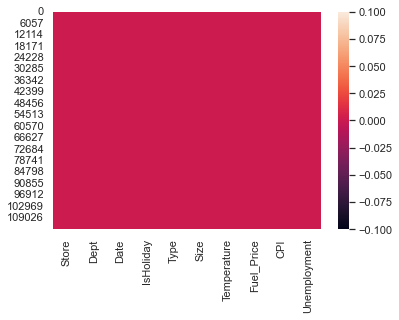

In [78]:
sns.set(rc = {'figure.figsize':(6,4)}, font_scale = 1)
sns.heatmap(df_result.isnull())

In [79]:
df_result.isna().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Splitting the 'Date' column into 'Year', 'Month' & 'Day'

In [80]:
df_result['Date'] = pd.to_datetime(df_result['Date'])
df_result['Year'] = df_result.Date.dt.year
df_result['Month'] = df_result.Date.dt.month
df_result['Day'] = df_result.Date.dt.day

In [81]:
df_result.head(10)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,2012,11,2
1,1,1,2012-11-09,False,A,151315,61.24,3.314,223.481307,6.573,2012,11,9
2,1,1,2012-11-16,False,A,151315,52.92,3.252,223.512911,6.573,2012,11,16
3,1,1,2012-11-23,True,A,151315,56.23,3.211,223.561947,6.573,2012,11,23
4,1,1,2012-11-30,False,A,151315,52.34,3.207,223.610984,6.573,2012,11,30
5,1,1,2012-12-07,False,A,151315,64.12,3.198,223.660021,6.573,2012,12,7
6,1,1,2012-12-14,False,A,151315,48.89,3.168,223.719277,6.573,2012,12,14
7,1,1,2012-12-21,False,A,151315,56.02,3.098,223.839845,6.573,2012,12,21
8,1,1,2012-12-28,True,A,151315,44.79,3.108,223.960414,6.573,2012,12,28
9,1,1,2013-01-04,False,A,151315,41.73,3.161,224.080983,6.525,2013,1,4


### Encoding the Categorical Columns for 'test.csv'

In [82]:
# Dropping the 'Date' column
df_result.drop('Date', axis=1, inplace=True)

### One-Hot Encoding

In [83]:
res_cols = df_result[['IsHoliday', 'Type']] 

In [84]:
from sklearn.preprocessing import OneHotEncoder
#One-hot-encoding the categorical columns.
encoder = OneHotEncoder(handle_unknown='ignore')
#Converting it to dataframe
df_encoder = pd.DataFrame(encoder.fit_transform(res_cols).toarray())
df_res_final = df_result.join(df_encoder)
df_res_final.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,0,1,2,3,4
0,1,1,False,A,151315,55.32,3.386,223.462779,6.573,2012,11,2,1.0,0.0,1.0,0.0,0.0
1,1,1,False,A,151315,61.24,3.314,223.481307,6.573,2012,11,9,1.0,0.0,1.0,0.0,0.0
2,1,1,False,A,151315,52.92,3.252,223.512911,6.573,2012,11,16,1.0,0.0,1.0,0.0,0.0
3,1,1,True,A,151315,56.23,3.211,223.561947,6.573,2012,11,23,0.0,1.0,1.0,0.0,0.0
4,1,1,False,A,151315,52.34,3.207,223.610984,6.573,2012,11,30,1.0,0.0,1.0,0.0,0.0


In [85]:
#Dropping the columns that have already been One-Hot-Encoded
df_res_final.drop(['IsHoliday', 'Type'], axis=1, inplace=True)

### Predicted Sales

In [86]:
#Predicted Sales for the test set
predicted_test = regressor.predict(df_res_final)

In [87]:
predicted_test

array([35685.42, 17938.65, 22366.57, ...,   559.25,   502.86,   573.24])

In [88]:
pred_sales = pd.DataFrame(predicted_test, columns=['Predicted_Sales'])

In [89]:
df_graph = pred_sales.copy()

In [90]:
df_graph.head(10)

,Predicted_Sales
0,35685.424
1,17938.645
2,22366.574
3,17842.391
4,30301.665
5,49322.824
6,32625.939
7,35525.301
8,23326.367
9,20809.719


### Visualization of the Predicted Values

In [91]:
df_graph["Month"] = df_result["Month"]

In [92]:
df_graph.head(10)

,Predicted_Sales,Month
0,35685.424,11
1,17938.645,11
2,22366.574,11
3,17842.391,11
4,30301.665,11
5,49322.824,12
6,32625.939,12
7,35525.301,12
8,23326.367,12
9,20809.719,1


In [93]:
Predict_Month = df_graph.groupby(['Month'])[['Predicted_Sales']].sum()
Predict_Month

,Predicted_Sales
Month,
1,1.714089e+08
2,1.863708e+08
3,2.279964e+08
4,1.855236e+08
5,2.351503e+08
6,1.903452e+08
7,1.897658e+08
11,2.667424e+08
12,2.341920e+08


In [94]:
Predict_Month['Predicted_Sales'] = Predict_Month['Predicted_Sales'].astype('int')
Predict_Month

,Predicted_Sales
Month,
1,171408867
2,186370814
3,227996354
4,185523581
5,235150311
6,190345200
7,189765782
11,266742394
12,234192032


In [95]:
start_date = '2010-11-01'
end_date = '2011-07-31'

In [96]:
mask_11 = (df_merge['Date'] >= start_date) & (df_merge['Date'] <= end_date)

In [97]:
df_11 = df_merge.loc[mask_11]
df_11.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months
39,1,1,2010-11-05,34238.88,False,A,151315,58.74,2.689,211.956394,7.838,2010,11,5,2010 - 11
40,1,1,2010-11-12,19549.39,False,A,151315,59.61,2.728,212.003944,7.838,2010,11,12,2010 - 11
41,1,1,2010-11-19,19552.84,False,A,151315,51.41,2.771,211.889674,7.838,2010,11,19,2010 - 11
42,1,1,2010-11-26,18820.29,True,A,151315,64.52,2.735,211.748433,7.838,2010,11,26,2010 - 11
43,1,1,2010-12-03,22517.56,False,A,151315,49.27,2.708,211.607193,7.838,2010,12,3,2010 - 12
44,1,1,2010-12-10,31497.65,False,A,151315,46.33,2.843,211.465953,7.838,2010,12,10,2010 - 12
45,1,1,2010-12-17,44912.86,False,A,151315,49.84,2.869,211.405312,7.838,2010,12,17,2010 - 12
46,1,1,2010-12-24,55931.23,False,A,151315,52.33,2.886,211.405122,7.838,2010,12,24,2010 - 12
47,1,1,2010-12-31,19124.58,True,A,151315,48.43,2.943,211.404932,7.838,2010,12,31,2010 - 12
48,1,1,2011-01-07,15984.24,False,A,151315,48.27,2.976,211.404742,7.742,2011,01,7,2011 - 01


In [98]:
df_11['Date'] = pd.to_datetime(df_11['Date'])
df_11['Year'] = df_11.Date.dt.year
df_11['Month'] = df_11.Date.dt.month
df_11['Day'] = df_11.Date.dt.day

/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_29395/2595024560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11['Date'] = pd.to_datetime(df_11['Date'])
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_29395/2595024560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11['Year'] = df_11.Date.dt.year
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_29395/2595024560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [99]:
df_11.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months
39,1,1,2010-11-05,34238.88,False,A,151315,58.74,2.689,211.956394,7.838,2010,11,5,2010 - 11
40,1,1,2010-11-12,19549.39,False,A,151315,59.61,2.728,212.003944,7.838,2010,11,12,2010 - 11
41,1,1,2010-11-19,19552.84,False,A,151315,51.41,2.771,211.889674,7.838,2010,11,19,2010 - 11
42,1,1,2010-11-26,18820.29,True,A,151315,64.52,2.735,211.748433,7.838,2010,11,26,2010 - 11
43,1,1,2010-12-03,22517.56,False,A,151315,49.27,2.708,211.607193,7.838,2010,12,3,2010 - 12
44,1,1,2010-12-10,31497.65,False,A,151315,46.33,2.843,211.465953,7.838,2010,12,10,2010 - 12
45,1,1,2010-12-17,44912.86,False,A,151315,49.84,2.869,211.405312,7.838,2010,12,17,2010 - 12
46,1,1,2010-12-24,55931.23,False,A,151315,52.33,2.886,211.405122,7.838,2010,12,24,2010 - 12
47,1,1,2010-12-31,19124.58,True,A,151315,48.43,2.943,211.404932,7.838,2010,12,31,2010 - 12
48,1,1,2011-01-07,15984.24,False,A,151315,48.27,2.976,211.404742,7.742,2011,1,7,2011 - 01


In [100]:
start_date = '2011-11-01'
end_date = '2012-07-31'

In [101]:
mask_12 = (df_merge['Date'] >= start_date) & (df_merge['Date'] <= end_date)

In [102]:
df_12 = df_merge.loc[mask_12]
df_12.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months
91,1,1,2011-11-04,39886.06,False,A,151315,54.98,3.332,217.837382,7.866,2011,11,4,2011 - 11
92,1,1,2011-11-11,18689.54,False,A,151315,59.11,3.297,217.998085,7.866,2011,11,11,2011 - 11
93,1,1,2011-11-18,19050.66,False,A,151315,62.25,3.308,218.220509,7.866,2011,11,18,2011 - 11
94,1,1,2011-11-25,20911.25,True,A,151315,60.14,3.236,218.467621,7.866,2011,11,25,2011 - 11
95,1,1,2011-12-02,25293.49,False,A,151315,48.91,3.172,218.714733,7.866,2011,12,2,2011 - 12
96,1,1,2011-12-09,33305.92,False,A,151315,43.93,3.158,218.961846,7.866,2011,12,9,2011 - 12
97,1,1,2011-12-16,45773.03,False,A,151315,51.63,3.159,219.179453,7.866,2011,12,16,2011 - 12
98,1,1,2011-12-23,46788.75,False,A,151315,47.96,3.112,219.357722,7.866,2011,12,23,2011 - 12
99,1,1,2011-12-30,23350.88,True,A,151315,44.55,3.129,219.535990,7.866,2011,12,30,2011 - 12
100,1,1,2012-01-06,16567.69,False,A,151315,49.01,3.157,219.714258,7.348,2012,01,6,2012 - 01


In [103]:
df_12['Date'] = pd.to_datetime(df_12['Date'])
df_12['Year'] = df_12.Date.dt.year
df_12['Month'] = df_12.Date.dt.month
df_12['Day'] = df_12.Date.dt.day

/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_29395/1600803396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12['Date'] = pd.to_datetime(df_12['Date'])
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_29395/1600803396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12['Year'] = df_12.Date.dt.year
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_29395/1600803396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [104]:
df_12.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months
91,1,1,2011-11-04,39886.06,False,A,151315,54.98,3.332,217.837382,7.866,2011,11,4,2011 - 11
92,1,1,2011-11-11,18689.54,False,A,151315,59.11,3.297,217.998085,7.866,2011,11,11,2011 - 11
93,1,1,2011-11-18,19050.66,False,A,151315,62.25,3.308,218.220509,7.866,2011,11,18,2011 - 11
94,1,1,2011-11-25,20911.25,True,A,151315,60.14,3.236,218.467621,7.866,2011,11,25,2011 - 11
95,1,1,2011-12-02,25293.49,False,A,151315,48.91,3.172,218.714733,7.866,2011,12,2,2011 - 12
96,1,1,2011-12-09,33305.92,False,A,151315,43.93,3.158,218.961846,7.866,2011,12,9,2011 - 12
97,1,1,2011-12-16,45773.03,False,A,151315,51.63,3.159,219.179453,7.866,2011,12,16,2011 - 12
98,1,1,2011-12-23,46788.75,False,A,151315,47.96,3.112,219.357722,7.866,2011,12,23,2011 - 12
99,1,1,2011-12-30,23350.88,True,A,151315,44.55,3.129,219.535990,7.866,2011,12,30,2011 - 12
100,1,1,2012-01-06,16567.69,False,A,151315,49.01,3.157,219.714258,7.348,2012,1,6,2012 - 01


In [105]:
#Creating a table with the sales from every year
compare = df_11.groupby(['Month'])[['Weekly_Sales']].sum()
compare['2010-11'] = compare['Weekly_Sales']
compare.head(10)

,Weekly_Sales,2010-11
Month,,
1,1.637040e+08,1.637040e+08
2,1.863313e+08,1.863313e+08
3,1.793564e+08,1.793564e+08
4,2.265265e+08,2.265265e+08
5,1.816482e+08,1.816482e+08
6,1.897734e+08,1.897734e+08
7,2.299114e+08,2.299114e+08
11,2.028534e+08,2.028534e+08
12,2.887605e+08,2.887605e+08


In [106]:
compare.drop('Weekly_Sales', axis=1, inplace=True)

In [107]:
compare['2010-11'] = compare['2010-11'].astype('int')
compare

,2010-11
Month,
1,163703966
2,186331327
3,179356448
4,226526510
5,181648158
6,189773385
7,229911398
11,202853370
12,288760532


In [108]:
compare['2011-12'] = df_12.groupby(['Month'])[['Weekly_Sales']].sum()
compare['2011-12'] = compare['2011-12'].astype('int')
compare

,2010-11,2011-12
Month,,
1,163703966,168894471
2,186331327,192063579
3,179356448,231509650
4,226526510,188920905
5,181648158,188766479
6,189773385,240610329
7,229911398,187509452
11,202853370,210162354
12,288760532,288078102


In [109]:
compare['2012-13'] = Predict_Month['Predicted_Sales']
compare

,2010-11,2011-12,2012-13
Month,,,
1,163703966,168894471,171408867
2,186331327,192063579,186370814
3,179356448,231509650,227996354
4,226526510,188920905,185523581
5,181648158,188766479,235150311
6,189773385,240610329,190345200
7,229911398,187509452,189765782
11,202853370,210162354,266742394
12,288760532,288078102,234192032


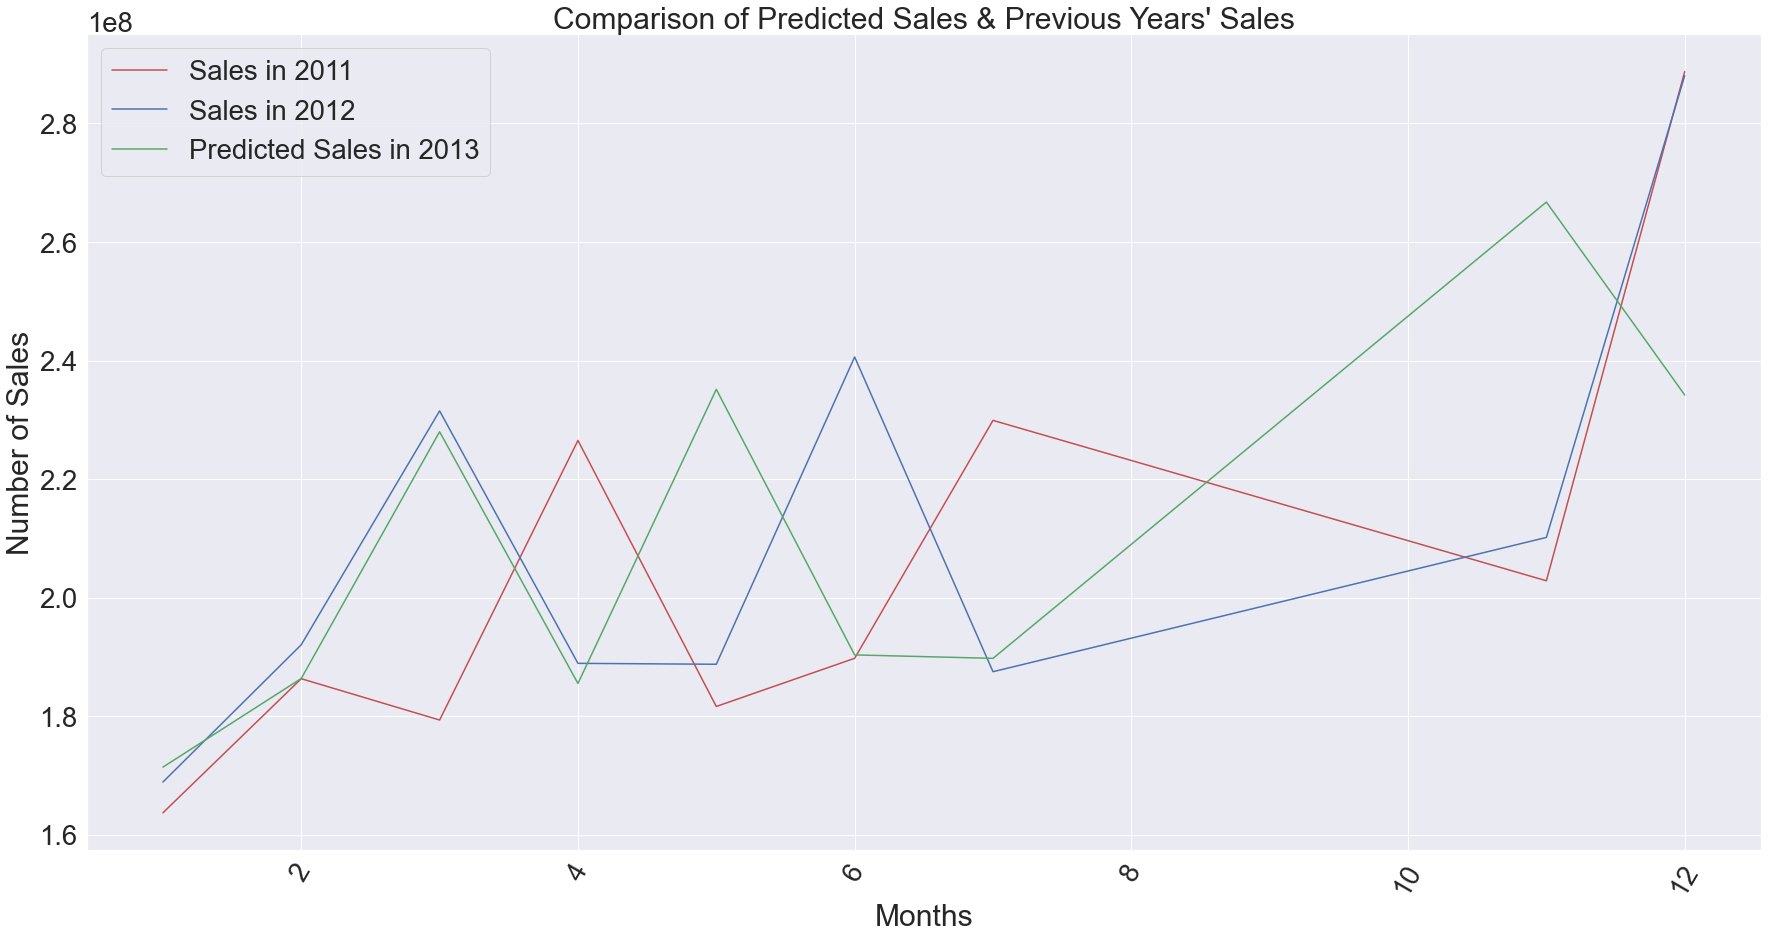

In [110]:
#Plot for the comparison of sales
sns.set(rc = {'figure.figsize':(30,15)}, font_scale = 2.5)
sns.lineplot(data=compare, x="Month", y="2010-11", color='r', label='Sales in 2011').set(title="Comparison of Predicted Sales & Previous Years' Sales")
sns.lineplot(data=compare, x="Month", y="2011-12", color='b', label='Sales in 2012')
sns.lineplot(data=compare, x="Month", y="2012-13", color='g', label='Predicted Sales in 2013')
plt.xticks(rotation=60)
plt.xlabel("Months")
plt.ylabel("Number of Sales")
plt.show()

The above graph shows the comparison of the predicted sales values in the year 2013 and sales numbers in the years 2011 & 2012. The predicted sales values were very similar to the previous years’ sales values that means if there would have been data about the actual sales values from the ‘test.csv’ dataset, it would have been very close.